# Computing the informativeness of tools annotations by exploiting all stated and inferred annotations. 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataframes calculated with the init command on ShareFAIR-KG  

In [2]:
dfToolallmetrics = pd.read_csv("../Dataframe/dfToolallmetrics.tsv.bz2", sep="\t") 
#All tool metrics (IC, entropy and number of annotations) on direct and inherited Topics and Operations of tool in bio.tools.

In [3]:
dfToolallmetrics.head()

,tool,toolLabel,topicScore,operationScore,score,topicEntropy,operationEntropy,entropy
0,https://bio.tools/bandage,Bandage,11.167762,19.530715,30.698476,2.120237,1.295219,3.415457
1,https://bio.tools/merqury,Merqury,22.715762,63.926245,86.642006,2.798589,3.546375,6.344963
2,https://bio.tools/multiqc,MultiQC,19.489903,13.593745,33.083648,3.332703,1.568473,4.901176
3,https://bio.tools/bcftools,BCFtools,41.715790,12.764073,54.479863,5.217251,2.326898,7.544149
4,https://bio.tools/quast,QUAST,7.457422,25.102923,32.560345,1.100262,2.013265,3.113527


### Explanation of calculated scores 
- topicScore: Score based on the IC (Information Content) of topics associated with a tool.
- operationScore: Score based on the IC of operations associated with a tool.
- score: Sum of the two previous scores.
- topicEntropy: Total entropy of topics associated with a tool.
- operationEntropy: Total entropy of operations associated with a tool.
- entropy: Sum of the previous entropies.

### Count the number of tools in the “Low,” “Medium,” or “High” category in terms of informativeness according to the sum of their topic and operation entropy 

In [4]:
# Define the conditions and corresponding labels
conditions = [
    dfToolallmetrics['entropy'] < 5,
    (dfToolallmetrics['entropy'] >= 5) & (dfToolallmetrics['entropy'] < 10),
    dfToolallmetrics['entropy'] >= 10
]
choices = ['Low', 'Medium', 'High']

# Create Information_level column for dfToolallmetrics
dfToolallmetrics['Information_level'] = np.select(conditions, choices, default='Low')

dfToolallmetrics['Information_level'].value_counts()

Information_level
Low       15687
Medium    13379
High       1262
Name: count, dtype: int64

### Distribution of topic and operation entropy for bio.tools software taking into account inherited classes. 

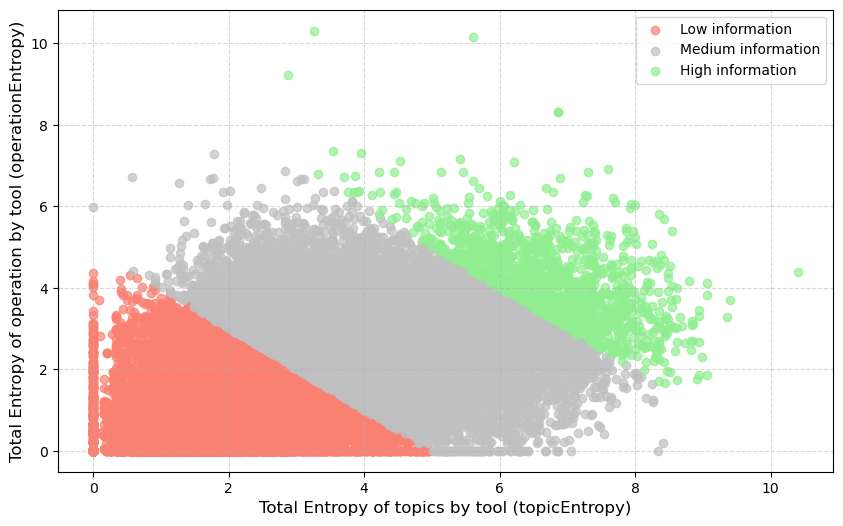

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

# Define group based on SumEnt conditions
entropy_sum = dfToolallmetrics['entropy']
low_info = entropy_sum < 5
medium_info = (entropy_sum >= 5) & (entropy_sum < 10)
high_info = entropy_sum >= 10

# Assign custom colors: red for low, gray for medium, green for high
low_color = 'salmon'
medium_color = 'silver'
high_color = 'lightgreen'

# Plot each group separately with specified colors
ax.scatter(dfToolallmetrics['topicEntropy'][low_info], 
           dfToolallmetrics['operationEntropy'][low_info],
           color=low_color, label='Low information', alpha=0.7)

ax.scatter(dfToolallmetrics['topicEntropy'][medium_info], 
           dfToolallmetrics['operationEntropy'][medium_info],
           color=medium_color, label='Medium information', alpha=0.7)

ax.scatter(dfToolallmetrics['topicEntropy'][high_info], 
           dfToolallmetrics['operationEntropy'][high_info],
           color=high_color, label='High information', alpha=0.7)

# Labels and title
ax.set_xlabel("Total Entropy of topics by tool (topicEntropy)", fontsize=12)
ax.set_ylabel("Total Entropy of operation by tool (operationEntropy)", fontsize=12)
ax.legend()

ax.grid(True, linestyle='--', alpha=0.5)

plt.show()


The total entropy Se of a tool is the sum of the topic entropy and the operation entropy.
Red dots represent tools with low information (Se < 5), gray dots represent tools with medium
information 5 <= Se < 10, and green dots show tools annotated with highly informative annotations
(Se >= 10).